## Necessary Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1. Importing the CSV file as a Pandas DataFrame Object

In [3]:
df = pd.read_csv('./data/data.csv')

### Checking Top 5 Records 

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Shape of the dataset

In [5]:
print(f'Shape of the dataset: {df.shape}')

Shape of the dataset: (7043, 21)


### Data Types and Metadata for each column

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Total charges should be integer or float not object(str)

## 2. Dataset Information 
##### The Telco Communications company tracks these 21 features across all its members and records data if the customer churned or not.
---

- **customerID**: Unique identifier for each customer.
- **gender**: Gender of each customer -> (Female/Male)
- **SeniorCitizen**: Binary flag for seniority -> (0/1)
- **Partner**: Binary flag for if the customer has a partner -> (Yes/No)
- **Dependents**: Binary flag for if the customer has any dependents -> (Yes/No)
- **tenure**: Number of months the customer has stayed with the company.
- **PhoneService**: Binary flag for if the customer has phone service or not -> (Yes/No)
- **MultipleLines**: Whether customer has multiple lines or not -> (Yes/No/No phone service)
- **InternetService**: Customer's internet service provider -> (DSL, Fiber optic, No)
- **OnlineSecurity**: Whether the customer took online security services -> (Yes/No/No internet service)
- **OnlineBackup**: Whether the customer took online backup services -> (Yes/No/No internet service)
- **DeviceProtection**: Whether the customer has device protection plan -> (Yes/No/No internet service)
- **TechSupport**: Whether the customer has tech support -> (Yes/No/No internet service)
- **StreamingTV**: Whether the customer streams TV -> (Yes/No/No internet service)
- **StreamingMovies**: Whether the customer streams movies -> (Yes/No/No internet service)
- **Contract**: The contract term of the customer -> (Month-to-month, One year, Two year)
- **PaperlessBilling**: Whether the customer has paperless billing -> (Yes/No)
- **PaymentMethod**: The customer's payment method -> (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- **MonthlyCharges**: The amount charged to the customer monthly (Float).
- **TotalCharges**: The total amount charged to the customer (Float).
- **Churn**: Whether the customer churned or not -> (Yes/No)

## 3.1 Checking Nulls

In [13]:
total_nulls = df.isnull().sum().sum()
print(f'Total nulls in the dataset: {total_nulls}')

if total_nulls > 0:
    display(df.isnull().sum())
else:
    print("We don't have any nulls in the dataset!")

Total nulls in the dataset: 0
We don't have any nulls in the dataset!


## 3.2 Checking Duplicates

In [12]:
total_duplicates = df.duplicated().sum().item()
print(f'Total duplicated rows in the dataset:{total_duplicates}')

if total_duplicates>0:
    display(df.iloc[df.duplicated()])
else:
    print('No duplicates at all!')

Total duplicated rows in the dataset:0
No duplicates at all!


## 3.3 Checking Unique Values in each column (only categorical values)

Text(0.5, 1.0, 'Distinct Values in Categorical Features')

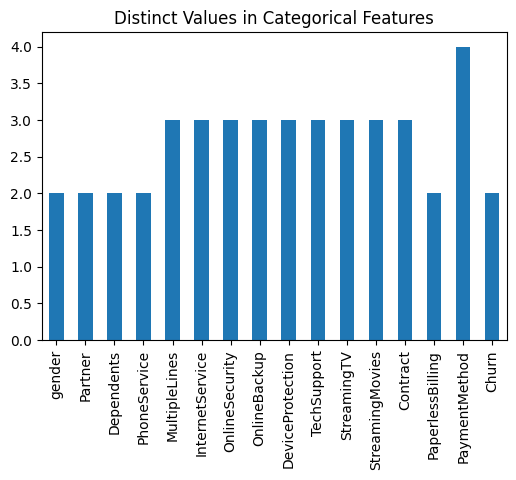

In [26]:
plt.figure(figsize=(6,4))
df[df.select_dtypes(exclude='number').columns.tolist()].drop(columns=['customerID','TotalCharges']).nunique().plot(kind='bar')
plt.title('Distinct Values in Categorical Features')

## Insights
- Data is uniform with no nulls 
- single column seems to be misplaced as object datatype instead of float (TotalCharges)
- other than that we are good to go

## 4.1 Visualizing the Target Distribution
---
- to make any visualization, we need to separate out our training, validation and test sets or else we might contain data leakage and incorrect data visualization
- here we assume that the total dataset represents a population from which we will segment three parts TRAIN, VALIDATION and TESTING and we also assume that the problem only present us with TRAIN & VALIDATION data with labels and TEST data without them (even though we have that we will use it to test the performance)

### Data Splitting (to prevent leakage)

In [46]:
import sklearn
from sklearn.model_selection import train_test_split
SEED = 42 ## for reproducible folds
active,test = train_test_split(df,test_size=1000,stratify=df.Churn,random_state=SEED) 
train,val = train_test_split(active,test_size=0.2,stratify=active.Churn,random_state=SEED)

print(
    f'Size of Train Set: {train.shape}'
    '\n'
    f'Size of Validation Set: {val.shape}'
    '\n'
    f'Size of Test Set: {test.shape}'
)

Size of Train Set: (4834, 21)
Size of Validation Set: (1209, 21)
Size of Test Set: (1000, 21)


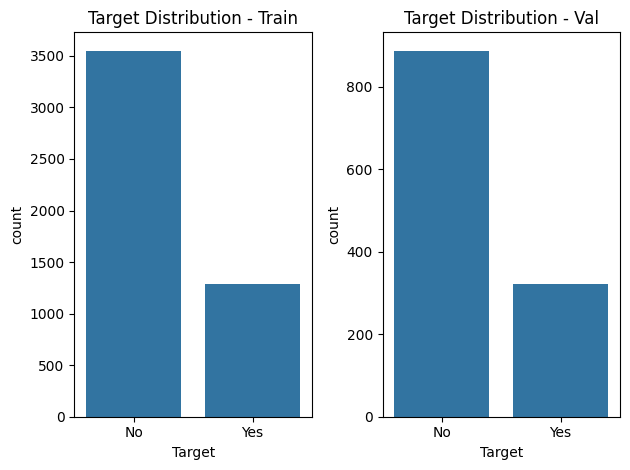

In [35]:
fig,ax = plt.subplots(1,2)
sns.countplot(data=train,x='Churn',ax=ax[0])
ax[0].set_title('Target Distribution - Train')
ax[0].set_xlabel('Target')

sns.countplot(data=val,x='Churn',ax=ax[1])
ax[1].set_title('Target Distribution - Val')
ax[1].set_xlabel('Target')

plt.tight_layout()

#### Class Imbalance - Use class_weights and F1 score or AUC_ROC for validation

## 4.2 Visualizing the Numerical Features
- single numerical column has a issue of data type
- for the eda we will just use astype to create another column with currect data type
- later on in model training scripts we will address this in modular code

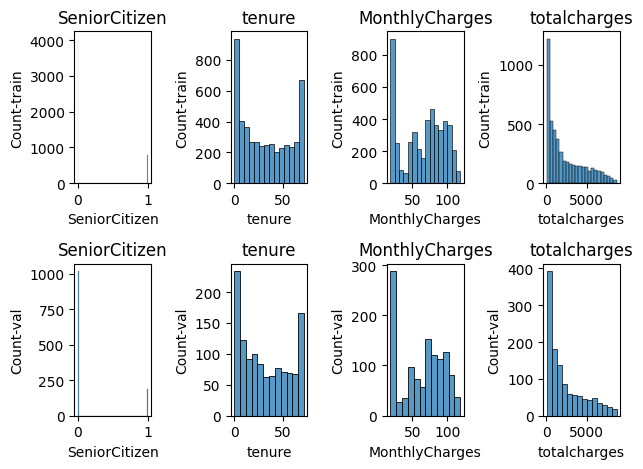

In [52]:
##Fillin empty rows with nan 
train['totalcharges'] = train['TotalCharges'].apply(lambda x: np.nan if x == " " else float(x))
val['totalcharges'] = val['TotalCharges'].apply(lambda x: np.nan if x == " " else float(x))
##filling them with global average - there were only 6 missing values so it won't matter a lot
train['totalcharges'].fillna(train.totalcharges.mean())
val['totalcharges'].fillna(val.totalcharges.mean())

num_cols = train.select_dtypes(include='number').columns.tolist()
names = ['train','val']
fig,ax = plt.subplots(2,len(num_cols))

for i,dataset in enumerate([train,val]):
    for j,cols in enumerate(num_cols):
        sns.histplot(data=dataset,ax=ax[i,j],x=cols)
        ax[i,j].set_title(f'{cols}')
        ax[i,j].set_ylabel(f'Count-{names[i]}')
plt.tight_layout()

## 4.3 Distribution of Categorical Features with Class Distribution - Train set only

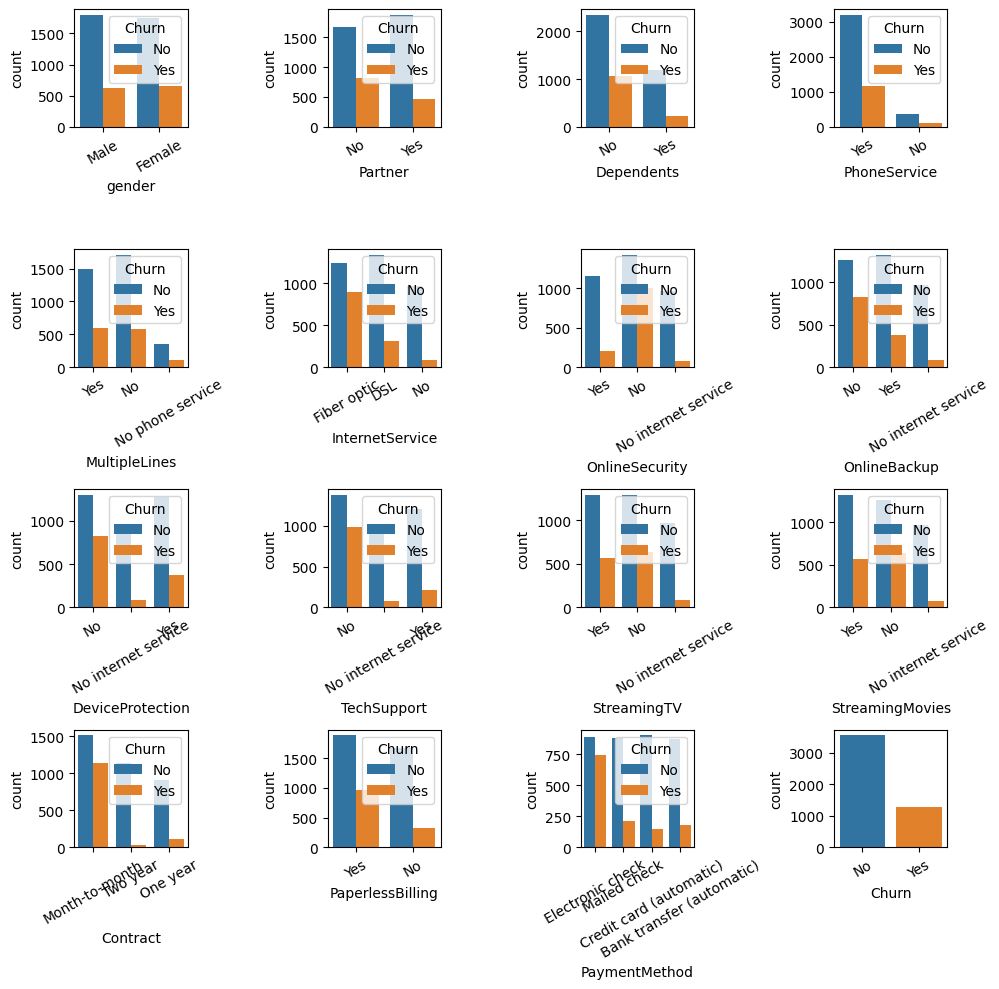

In [62]:
cats = [cols for cols in train.select_dtypes(exclude='number').columns.tolist() if cols not in set(['customerID','TotalCharges'])]
fig,ax = plt.subplots(4,4,figsize=(10,10))
ax= ax.flatten()
# fig.suptitle('Train Categorical Data Distribution')
for idx,cols in enumerate(cats):
    sns.countplot(
        data=train,
        x = cols,
        hue='Churn',
        ax=ax[idx]
    )
    ax[idx].tick_params('x',rotation=30)
plt.tight_layout()

## 4.4 Box plot distribution of target variable across categorical features
- this plot incentivized the use of TargetEncoding if the means show drastic variation in categories(which it does)

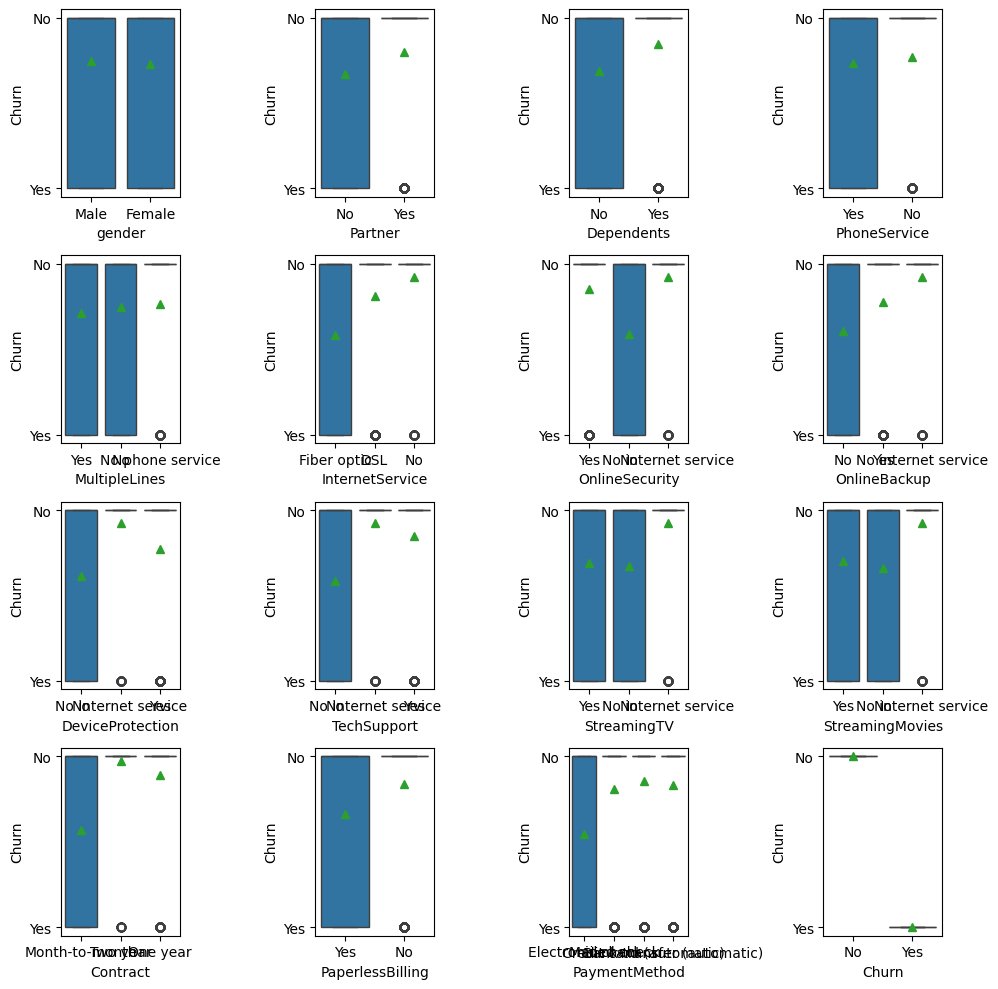

In [67]:
fig,ax = plt.subplots(4,4,figsize=(10,10))
ax = ax.flatten()

for idx,cols in enumerate(cats):
    sns.boxplot(
        data=train,
        x=cols,
        y='Churn',
        showmeans=True,
        ax=ax[idx]
    )

plt.tight_layout()